# **1. Perkenalan Dataset**



1. **Sumber Dataset**:  
   Dataset di peroleh dari [Kaggle](https://www.kaggle.com/) dengan nama [Netflix Data](https://www.kaggle.com/datasets/ariyoomotade/netflix-data-cleaning-analysis-and-visualization)

2. **Tentang Dataset**:
   Dataset yang digunakan merupakan dataset yang berisi data tentang film dan acara yang tayang di Netflix. Dataset ini berisi informasi tentang judul, genre, tahun rilis, durasi, dan lain-lain. Dataset ini dapat digunakan untuk melakukan analisis dan pengolahan data terkait film dan acara yang tayang di Netflix. Data terdiri dari konten yang ditambahkan ke Netflix dari 2008 hingga 2021. Konten tertua 1925 dan yang terbaru seperti 2021

3. **Features Dataset**:  
   Berikut adalah penjelasan mengenai fitur dari dataset:
   - show_id : ID dari setiap judul yang ditayangkan
   - type : Tipe dari konten (Film atau Series)
   - title : Judul dari konten
   - director : Penulis dari konten
   - country : Negara asal konten
   - date_added : Tanggal konten ditambahkan ke Netflix
   - release_year : Tahun rilis konten
   - rating : Rating konten
   - duration : Durasi konten
   - listed_in : Genre dari konten

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [199]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from scipy.stats import chi2_contingency
from yellowbrick.cluster import KElbowVisualizer
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score


# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [200]:
df = pd.read_csv("netflix_data_inisiasi.csv")

In [201]:
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [202]:
df.tail()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
8785,s8797,TV Show,Yunus Emre,Not Given,Turkey,1/17/2017,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas"
8786,s8798,TV Show,Zak Storm,Not Given,United States,9/13/2018,2016,TV-Y7,3 Seasons,Kids' TV
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,12/15/2016,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ..."
8788,s8784,TV Show,Yoko,Not Given,Pakistan,6/23/2018,2016,TV-Y,1 Season,Kids' TV
8789,s8786,TV Show,YOM,Not Given,Pakistan,6/7/2018,2016,TV-Y7,1 Season,Kids' TV


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

### 4.1 Memahami Struktur Data


In [203]:
print("Jumlah Baris dan Kolom pada Dataset:")
df.shape

Jumlah Baris dan Kolom pada Dataset:


(8790, 10)

In [204]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [205]:
df.describe(include='all')

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
count,8790,8790,8790,8790,8790,8790,8790.000000,8790,8790,8790
unique,8790,2,8787,4528,86,1713,NaN,14,220,513
top,s1,Movie,9-Feb,Not Given,United States,1/1/2020,NaN,TV-MA,1 Season,"Dramas, International Movies"
freq,1,6126,2,2588,3240,110,NaN,3205,1791,362
mean,NaN,NaN,NaN,NaN,NaN,NaN,2014.183163,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,8.825466,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN


In [206]:
categorical_features = []
numerical_features = []

for col in df.columns:
    if df[col].dtype == 'object':
        categorical_features.append(col)
    else:
        numerical_features.append(col)

print('Kolom kategorikal:', categorical_features)
print('Jumlah kolom kategorikal:', len(categorical_features))
print('Kolom numerikal:', numerical_features)
print('Jumlah kolom numerikal:', len(numerical_features))


Kolom kategorikal: ['show_id', 'type', 'title', 'director', 'country', 'date_added', 'rating', 'duration', 'listed_in']
Jumlah kolom kategorikal: 9
Kolom numerikal: ['release_year']
Jumlah kolom numerikal: 1


### 4.2 Menangai Data Yang Hilang

In [207]:
df.isna().sum()

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

In [208]:
missing_percentages = (df.isnull().sum() / len(df)) * 100
print("\nPersentase data yang hilang dalam setiap kolom:\n")
print(missing_percentages)


Persentase data yang hilang dalam setiap kolom:

show_id         0.0
type            0.0
title           0.0
director        0.0
country         0.0
date_added      0.0
release_year    0.0
rating          0.0
duration        0.0
listed_in       0.0
dtype: float64


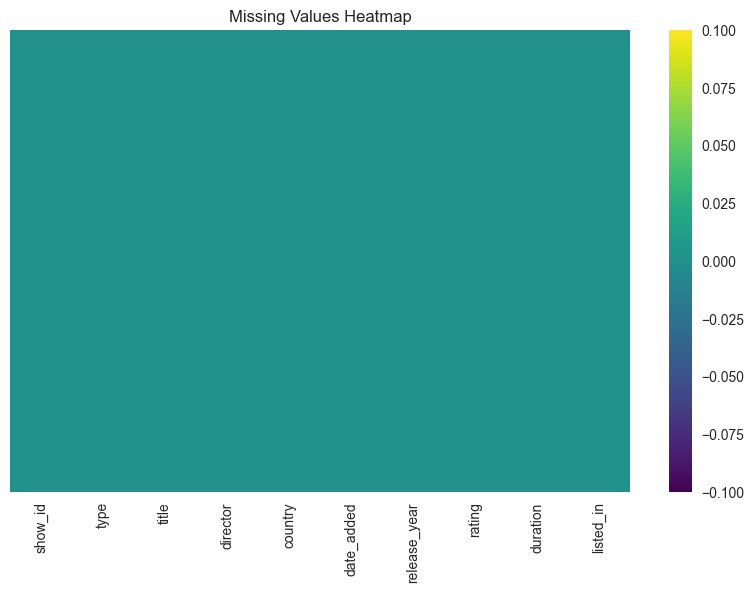

In [209]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), yticklabels=False, cbar=True, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

### 4.3 Analisa Distribusi dan Korelasi Data

In [210]:
print("Analisa Deksriptif:")
print(df.describe(include='all').T)

Analisa Deksriptif:
               count unique                           top  freq         mean  \
show_id         8790   8790                            s1     1          NaN   
type            8790      2                         Movie  6126          NaN   
title           8790   8787                         9-Feb     2          NaN   
director        8790   4528                     Not Given  2588          NaN   
country         8790     86                 United States  3240          NaN   
date_added      8790   1713                      1/1/2020   110          NaN   
release_year  8790.0    NaN                           NaN   NaN  2014.183163   
rating          8790     14                         TV-MA  3205          NaN   
duration        8790    220                      1 Season  1791          NaN   
listed_in       8790    513  Dramas, International Movies   362          NaN   

                   std     min     25%     50%     75%     max  
show_id            NaN     NaN    

In [211]:
content_type_analysis = df.groupby('type').agg({
    'show_id': 'count',
    'release_year': ['min', 'max', 'mean'],
    'rating': lambda x: x.value_counts().head(1)
}).round(2)
print("\nAnalisa Berdasarkan Tipe Konten:")
print(content_type_analysis)


Analisa Berdasarkan Tipe Konten:
        show_id release_year                  rating
          count          min   max     mean <lambda>
type                                                
Movie      6126         1942  2021  2013.12     2062
TV Show    2664         1925  2021  2016.63     1143


Text(0, 0.5, 'Count')

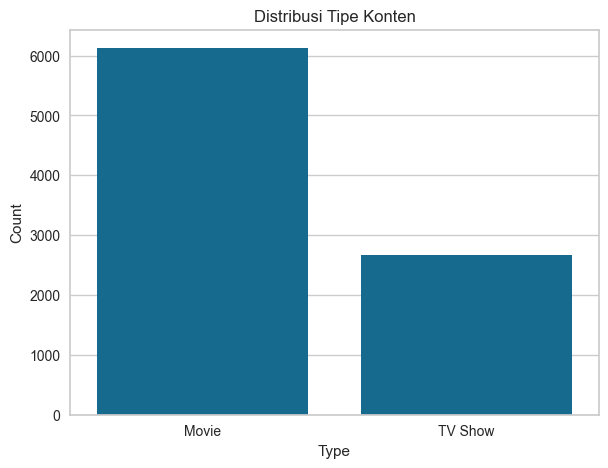

In [212]:
plt.figure(figsize=(15, 5))

# Content Type Distribution
plt.subplot(1, 2, 1)
sns.countplot(data=df, x='type')
plt.title('Distribusi Tipe Konten', fontsize=12)
plt.xlabel('Type')
plt.ylabel('Count')

In [213]:
rating_analysis = df.groupby('rating').agg({
    'show_id': 'count',
    'type': lambda x: x.value_counts().head(1),
    'release_year': 'mean'
})
print("\n Analisa Berdasarkan Rating:")
print(rating_analysis)


 Analisa Berdasarkan Rating:
          show_id  type  release_year
rating                               
G              41    41   1997.804878
NC-17           3     3   2015.000000
NR             79    75   2010.860759
PG            287   287   2008.428571
PG-13         490   490   2009.314286
R             799   797   2010.471840
TV-14        2157  1427   2013.663885
TV-G          220   126   2015.745455
TV-MA        3205  2062   2016.663027
TV-PG         861   540   2013.536585
TV-Y          306   175   2017.183007
TV-Y7         333   194   2015.510511
TV-Y7-FV        6     5   2014.833333
UR              3     3   1999.333333


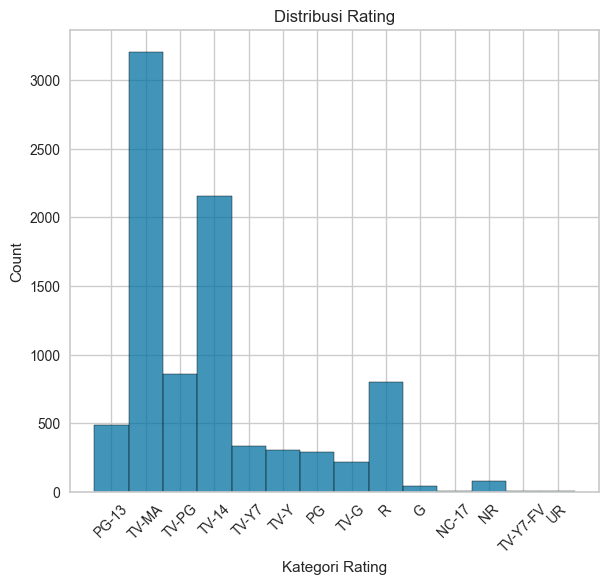

In [214]:
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.histplot(data=df, x='rating', discrete=True)
plt.title('Distribusi Rating', fontsize=12)
plt.xticks(rotation=45)
plt.xlabel('Kategori Rating')
plt.ylabel('Count')

plt.show()

In [215]:
year_analysis = df.groupby('release_year').agg({
    'show_id': 'count',
    'type': lambda x: x.value_counts().head(1),
    'rating': lambda x: x.value_counts().head(1)
}).sort_values('release_year', ascending=False)
print("\n Analisa Berdasarkan Tahun Rilis:")
print(year_analysis.head(10))


 Analisa Berdasarkan Tahun Rilis:
              show_id  type  rating
release_year                       
2021              592   315     270
2020              953   517     469
2019             1030   633     500
2018             1146   767     549
2017             1030   765     451
2016              901   658     340
2015              555   396     184
2014              352   264      99
2013              286   225      75
2012              236   173      72


Text(0.95, 0.95, 'Skewness: -3.45')

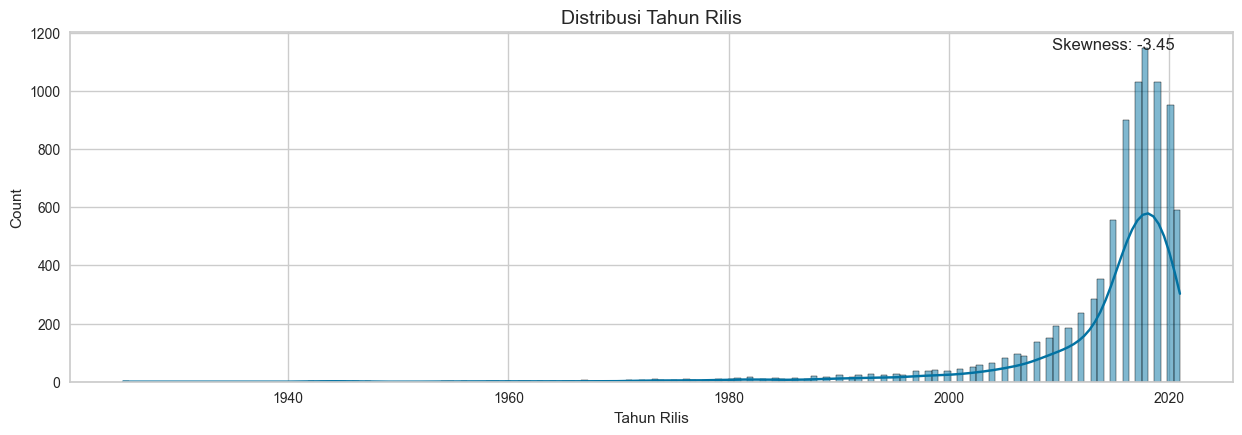

In [216]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 1, 1)
sns.histplot(data=df, x='release_year', kde=True)
plt.title('Distribusi Tahun Rilis', fontsize=14)
plt.xlabel('Tahun Rilis')
plt.ylabel('Count')

release_year_skewness = df['release_year'].skew()
plt.text(0.95, 0.95, f'Skewness: {release_year_skewness:.2f}', 
         transform=plt.gca().transAxes, 
         horizontalalignment='right')

In [217]:
country_analysis = df.groupby('country').agg({
    'show_id': 'count',
    'type': lambda x: x.value_counts().head(1),
    'rating': lambda x: x.value_counts().head(1)
}).sort_values('show_id', ascending=False)
print("\n Daftar 10 Negara Berdasarkan Konten:")
print(country_analysis.head(10))


 Daftar 10 Negara Berdasarkan Konten:
                show_id  type  rating
country                              
United States      3240  2395    1000
India              1057   976     574
United Kingdom      638   387     228
Pakistan            421   350     139
Not Given           287   257      94
Canada              271   187      87
Japan               259   172      93
South Korea         214   165      91
France              213   148     113
Spain               182   129     144


Text(0, 0.5, 'Negara')

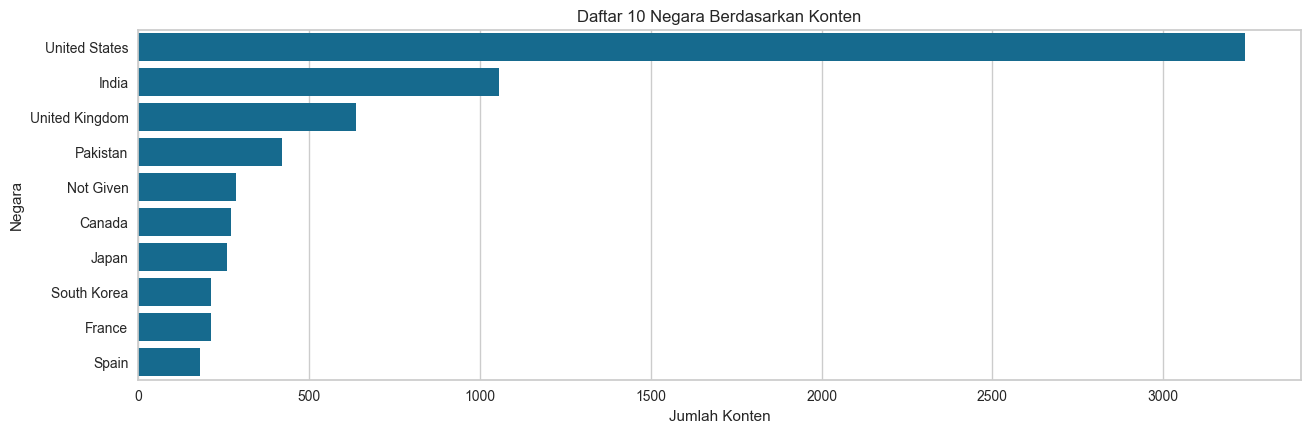

In [218]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 1, 1)
top_10_countries = df['country'].value_counts().head(10)
sns.barplot(x=top_10_countries.values, y=top_10_countries.index)
plt.title('Daftar 10 Negara Berdasarkan Konten', fontsize=12)
plt.xlabel('Jumlah Konten')
plt.ylabel('Negara')

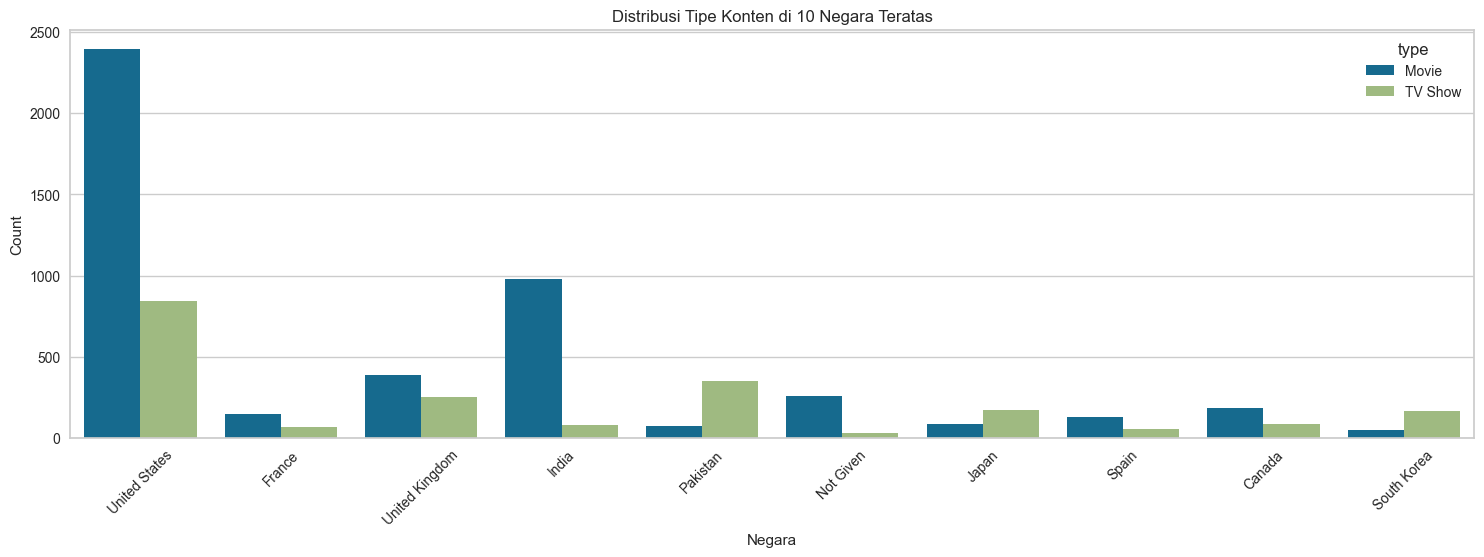

In [219]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 1, 2)
top_5_countries = df['country'].value_counts().head(10).index
df_top5 = df[df['country'].isin(top_5_countries)]
sns.countplot(data=df_top5, x='country', hue='type')
plt.title('Distribusi Tipe Konten di 10 Negara Teratas', fontsize=12)
plt.xticks(rotation=45)
plt.xlabel('Negara')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

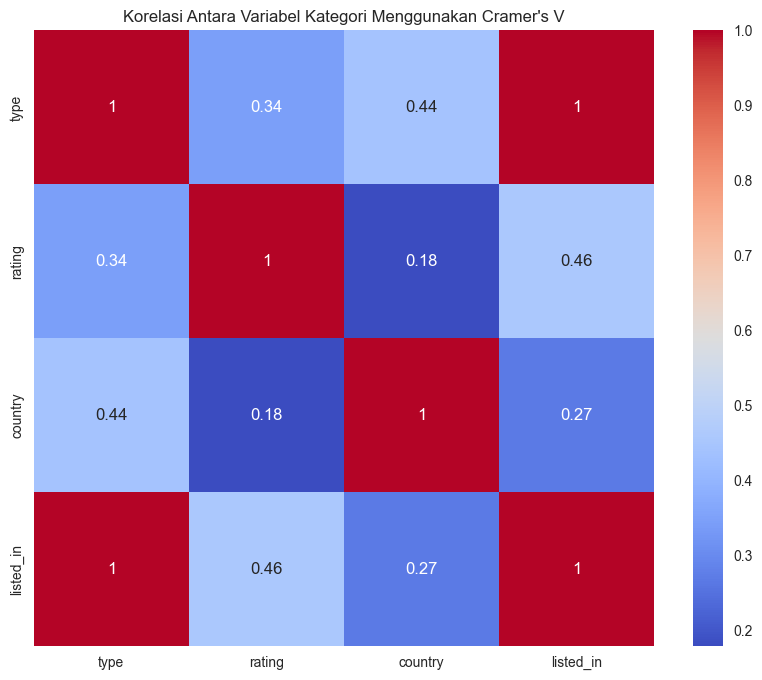

In [220]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    min_dim = min(confusion_matrix.shape) - 1
    return np.sqrt(chi2 / (n * min_dim))

categorical_cols = ['type', 'rating', 'country', 'listed_in']

n_cols = len(categorical_cols)
cat_correlation = np.zeros((n_cols, n_cols))

for i in range(n_cols):
    for j in range(n_cols):
        cat_correlation[i, j] = cramers_v(df[categorical_cols[i]], df[categorical_cols[j]])

plt.figure(figsize=(10, 8))
sns.heatmap(cat_correlation, 
            annot=True, 
            cmap='coolwarm', 
            xticklabels=categorical_cols,
            yticklabels=categorical_cols)
plt.title("Korelasi Antara Variabel Kategori Menggunakan Cramer's V")
plt.show()

### 4.4 Visualisasi Data

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

### Menilai dataset

In [221]:
print("Nilai yang Hilang:")
print(df.isnull().sum())
print("\nPersentase Nilai yang Hilang:")
print((df.isnull().sum() / len(df) * 100).round(2), '%')

Nilai yang Hilang:
show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

Persentase Nilai yang Hilang:
show_id         0.0
type            0.0
title           0.0
director        0.0
country         0.0
date_added      0.0
release_year    0.0
rating          0.0
duration        0.0
listed_in       0.0
dtype: float64 %


In [222]:
print("\nBaris Duplikat:", df.duplicated().sum())
print("Persentase Duplikat: {:.2f}%".format((df.duplicated().sum() / len(df) * 100)))



Baris Duplikat: 0
Persentase Duplikat: 0.00%


Tidak ditemukan data duplikat maupun nilai yang hilang

In [223]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


### Menghapus feature yang tidak diperlukan

In [224]:
df = df.drop(['show_id','date_added'], axis=1)

In [225]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          8790 non-null   object
 1   title         8790 non-null   object
 2   director      8790 non-null   object
 3   country       8790 non-null   object
 4   release_year  8790 non-null   int64 
 5   rating        8790 non-null   object
 6   duration      8790 non-null   object
 7   listed_in     8790 non-null   object
dtypes: int64(1), object(7)
memory usage: 549.5+ KB



Analisis Outlier untuk release_year:
Batas bawah: 2004.0
Batas atas: 2028.0
Jumlah outlier: 717


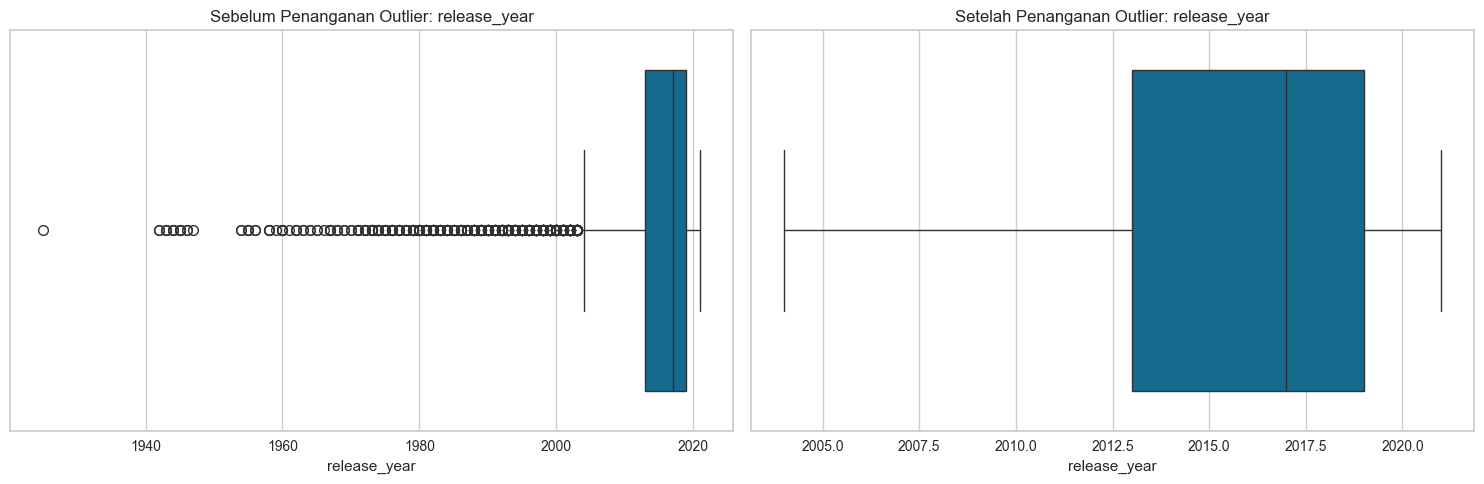

In [226]:
numeric_features = df.select_dtypes(include=['number']).columns

for feature in numeric_features:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    print(f"\nAnalisis Outlier untuk {feature}:")
    print(f"Batas bawah: {lower_bound}")
    print(f"Batas atas: {upper_bound}")
    print(f"Jumlah outlier: {len(df[(df[feature] < lower_bound) | (df[feature] > upper_bound)])}")
    
    plt.figure(figsize=(15, 5))
    
    plt.subplot(1, 2, 1)
    sns.boxplot(x=df[feature])
    plt.title(f'Sebelum Penanganan Outlier: {feature}')
    
    df[f'{feature}'] = df[feature].clip(lower_bound, upper_bound)
    
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[f'{feature}'])
    plt.title(f'Setelah Penanganan Outlier: {feature}')
    
    plt.tight_layout()
    plt.show()

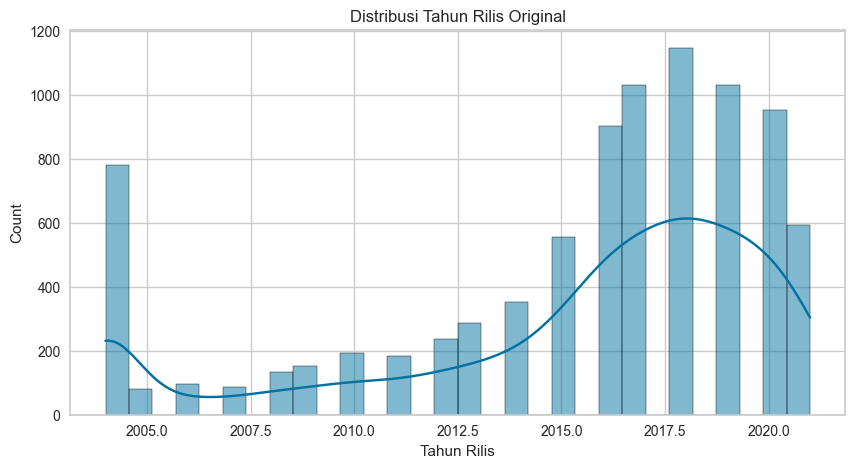

In [227]:
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='release_year', kde=True)
plt.title('Distribusi Tahun Rilis Original')
plt.xlabel('Tahun Rilis')
plt.show()

In [228]:
standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()

df['release_year'] = standard_scaler.fit_transform(df[['release_year']])
df['release_year'] = minmax_scaler.fit_transform(df[['release_year']])

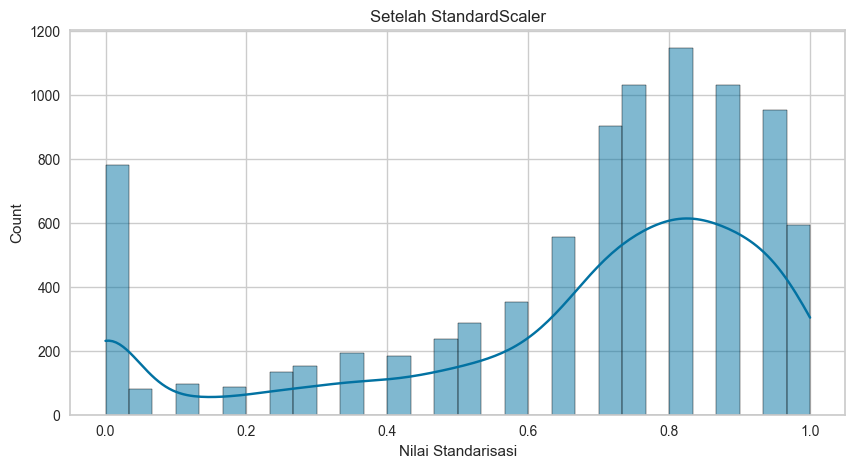

In [229]:
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='release_year', kde=True)
plt.title('Setelah StandardScaler')
plt.xlabel('Nilai Standarisasi') 
plt.show()

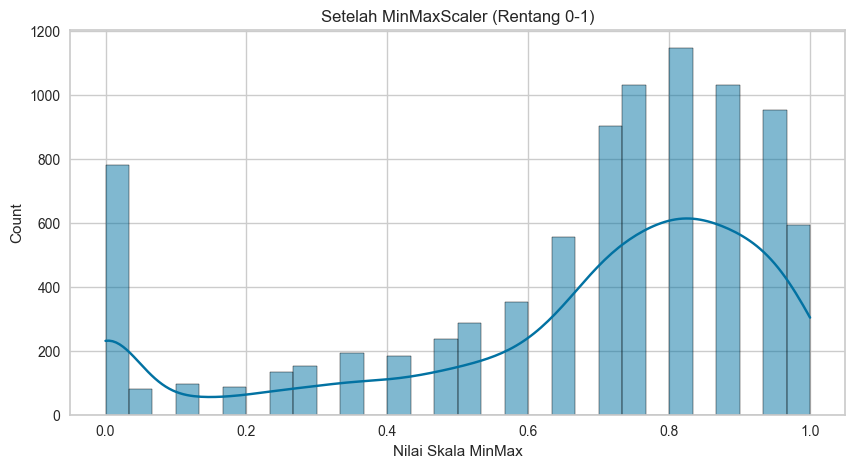

In [230]:
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='release_year', kde=True)
plt.title('Setelah MinMaxScaler (Rentang 0-1)')
plt.xlabel('Nilai Skala MinMax')
plt.show()

In [231]:
categorical_features = df.select_dtypes(include=['object']).columns
print(categorical_features)

Index(['type', 'title', 'director', 'country', 'rating', 'duration',
       'listed_in'],
      dtype='object')


In [232]:
print("Data Sebelum Dilakukan Encoding:")
df[categorical_features].head()

Data Sebelum Dilakukan Encoding:


,type,title,director,country,rating,duration,listed_in
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,PG-13,90 min,Documentaries
1,TV Show,Ganglands,Julien Leclercq,France,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,TV Show,Midnight Mass,Mike Flanagan,United States,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,TV-PG,91 min,"Children & Family Movies, Comedies"
4,Movie,Sankofa,Haile Gerima,United States,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [233]:
label_encoders = {}
df_lencoder = df.copy()

for col in categorical_features:
    label_encoders[col] = LabelEncoder()
    df_lencoder[col] = label_encoders[col].fit_transform(df[col])

df_lencoder.head()

,type,title,director,country,release_year,rating,duration,listed_in
0,0,1972,2294,80,0.941176,4,210,273
1,1,2644,2104,20,1.000000,8,0,241
2,1,4558,2865,80,1.000000,8,0,498
3,0,1657,627,6,1.000000,9,211,124
4,0,6043,1503,80,0.000000,8,32,318


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

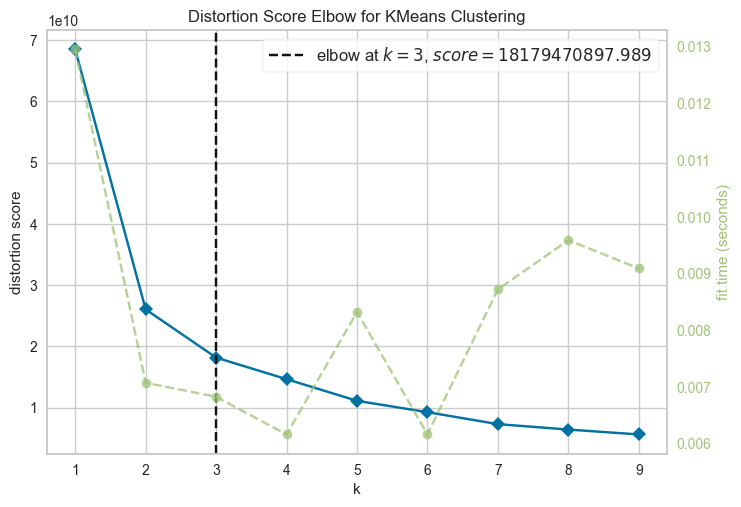

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [234]:
select_features_k_means = df_lencoder[['rating', 'director', 'release_year', 'listed_in', 'title', 'country', 'duration', 'type']]

kmeans = KMeans()

visualizer = KElbowVisualizer(kmeans, k=(1, 10))

visualizer.fit(select_features_k_means)

visualizer.show()

In [235]:
model_kmeans = KMeans(n_clusters=3, random_state=42)
model_kmeans.fit(select_features_k_means)

cluster_labels = model_kmeans.labels_

k = 3

def analyze_cluster(X, cluster_labels, k):
    print("Analysis of Cluster Characteristics:")
    for cluster_id in range(k):
        cluster_data = X[cluster_labels == cluster_id]
        
        print(f"\nCluster {cluster_id + 1}:")
        
        print(f"Cluster Size: {len(cluster_data)} items")

analyze_cluster(select_features_k_means, cluster_labels, k)

Analysis of Cluster Characteristics:

Cluster 1:
Cluster Size: 2928 items

Cluster 2:
Cluster Size: 2958 items

Cluster 3:
Cluster Size: 2904 items


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [236]:
silhouette_val = silhouette_score(select_features_k_means, cluster_labels)

print(f"Silhouette Score: {silhouette_val}")

Silhouette Score: 0.40017089836045905


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [237]:
best_score = 0
best_model = None
best_labels = None

# Hierarchical clustering
for n_clusters in range(2, 10):
    for linkage in ['ward', 'complete', 'average']:
        hc = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage)
        labels = hc.fit_predict(reduced_features)
        score = silhouette_score(reduced_features, labels)
        
        if score > best_score:
            best_score = score
            best_model = hc
            best_labels = labels

print(f"Best silhouette score: {best_score:.4f}")

Best silhouette score: 0.7554


Silhouette Score before feature selection: 0.40017089836045905
Silhouette Score after feature selection: 0.7554450867070208

Perbandingan:
Peningkatan Silhouette Score: 0.3553
Feature selection berhasil meningkatkan kualitas clustering


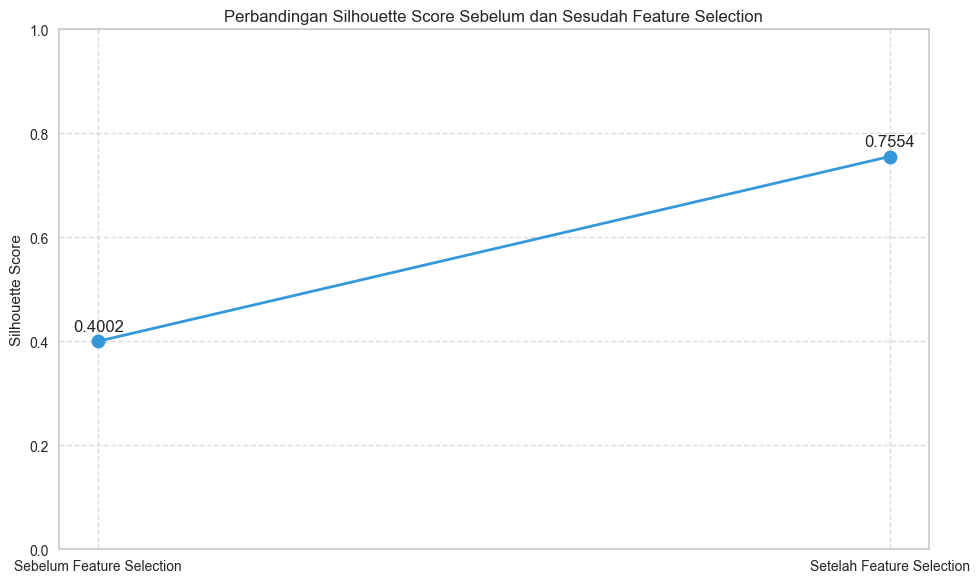

In [238]:
silhouette_before = silhouette_score(select_features_k_means, cluster_labels)
print("Silhouette Score before feature selection:", silhouette_before)

silhouette_after = silhouette_score(reduced_features, best_labels)
print("Silhouette Score after feature selection:", silhouette_after)

print("\nPerbandingan:")
print(f"Peningkatan Silhouette Score: {silhouette_after - silhouette_before:.4f}")
if silhouette_after > silhouette_before:
    print("Feature selection berhasil meningkatkan kualitas clustering")
else:
    print("Feature selection tidak meningkatkan kualitas clustering")

plt.figure(figsize=(10, 6))
stages = ['Sebelum Feature Selection', 'Setelah Feature Selection']
scores = [silhouette_before, silhouette_after]

plt.plot(stages, scores, marker='o', linestyle='-', linewidth=2, 
         color='#3498db', markersize=10)

for i, score in enumerate(scores):
    plt.text(i, score + 0.02, f'{score:.4f}', ha='center')

plt.ylabel('Silhouette Score')
plt.title('Perbandingan Silhouette Score Sebelum dan Sesudah Feature Selection')
plt.ylim(0, 1)
plt.grid(True, linestyle='--', alpha=0.7)


plt.tight_layout()
plt.show()

In [239]:
best_score = 0
best_model = None
best_labels = None
best_n_clusters = None
best_linkage = None

# Hierarchical clustering
for n_clusters in range(2, 10):
    for linkage in ['ward', 'complete', 'average']:
        hc = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage)
        labels = hc.fit_predict(reduced_features)
        score = silhouette_score(reduced_features, labels)
        
        if score > best_score:
            best_score = score
            best_model = hc
            best_labels = labels
            best_n_clusters = n_clusters
            best_linkage = linkage

print(f"Best silhouette score: {best_score:.4f}")
print(f"Best parameters: n_clusters={best_n_clusters}, linkage={best_linkage}")

final_model = AgglomerativeClustering(n_clusters=best_n_clusters, linkage=best_linkage)
final_labels = final_model.fit_predict(reduced_features)

final_score = silhouette_score(reduced_features, final_labels)
print(f"Final silhouette score: {final_score:.4f}")

df['Cluster'] = final_labels

cluster_counts = df['Cluster'].value_counts()
print("\nDistribusi Cluster:")
print(cluster_counts)

df.head()



Best silhouette score: 0.7554
Best parameters: n_clusters=4, linkage=ward
Final silhouette score: 0.7554

Distribusi Cluster:
Cluster
2    3187
0    2939
1    1797
3     867
Name: count, dtype: int64


,type,title,director,country,release_year,rating,duration,listed_in,Cluster
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,0.941176,PG-13,90 min,Documentaries,2
1,TV Show,Ganglands,Julien Leclercq,France,1.000000,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",1
2,TV Show,Midnight Mass,Mike Flanagan,United States,1.000000,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",1
3,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,1.000000,TV-PG,91 min,"Children & Family Movies, Comedies",2
4,Movie,Sankofa,Haile Gerima,United States,0.000000,TV-MA,125 min,"Dramas, Independent Movies, International Movies",0


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

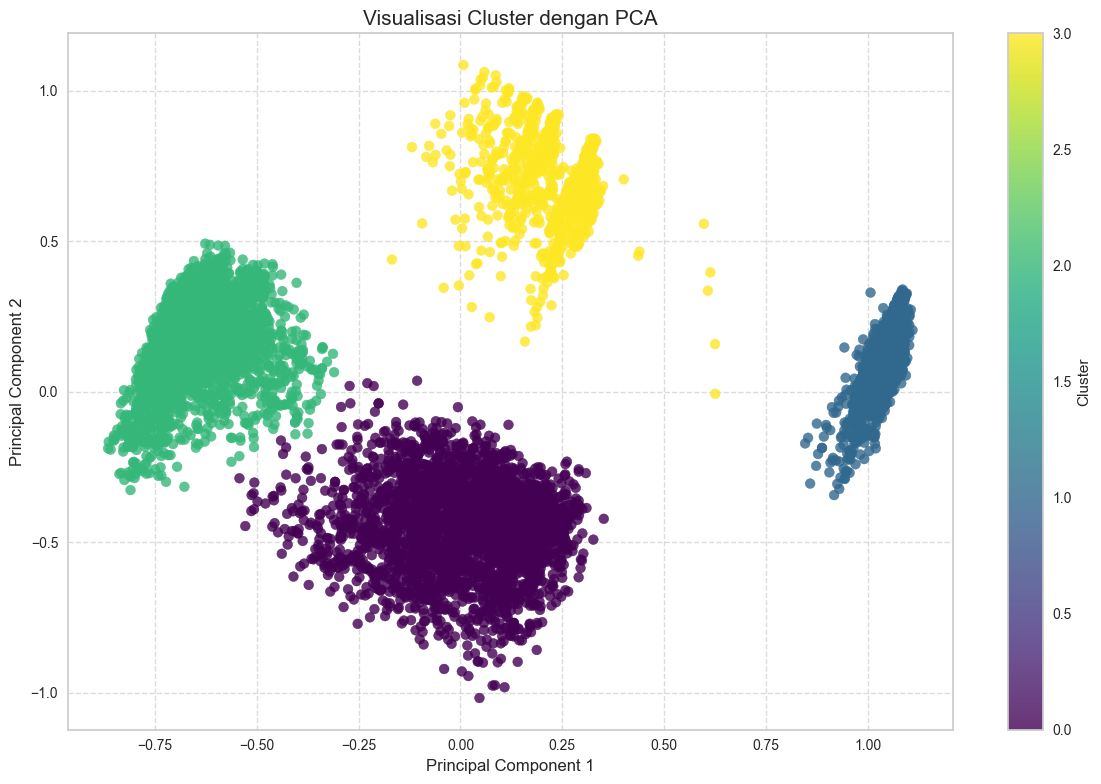

In [240]:
plt.figure(figsize=(12, 8))

plt.scatter(reduced_features[:, 0], reduced_features[:, 1], 
            c=final_labels, cmap='viridis', s=50, alpha=0.8)

plt.title('Visualisasi Cluster dengan PCA', fontsize=15)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.colorbar(label='Cluster')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



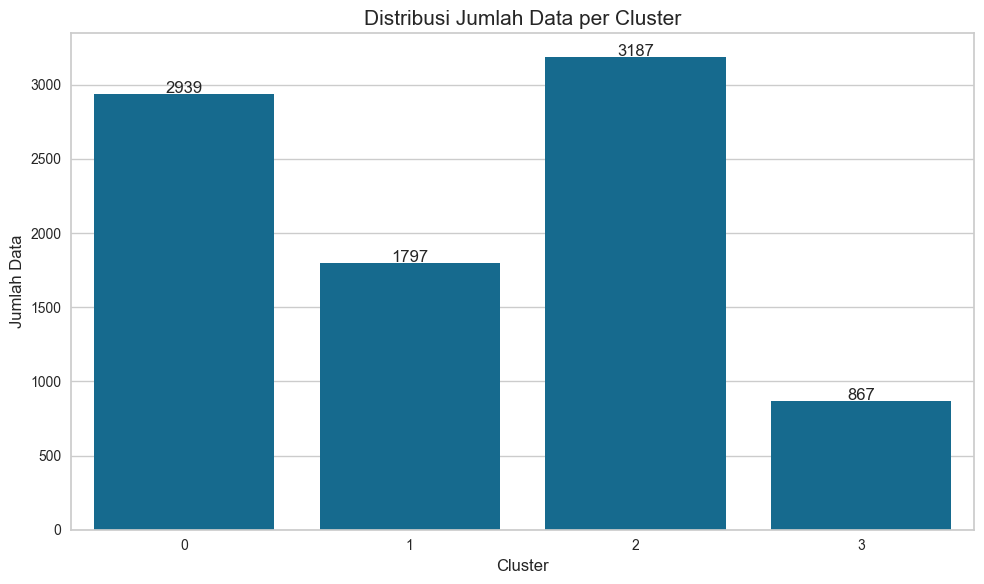

In [241]:
plt.figure(figsize=(10, 6))
cluster_counts = pd.Series(final_labels).value_counts().sort_index()
ax = sns.barplot(x=cluster_counts.index, y=cluster_counts.values)

for i, count in enumerate(cluster_counts.values):
    ax.text(i, count + 5, str(count), ha='center')

plt.title('Distribusi Jumlah Data per Cluster', fontsize=15)
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Jumlah Data', fontsize=12)
plt.tight_layout()
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [242]:
# Type your code here


### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [243]:
# Type your code here

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [244]:
# Type your code here

Tulis hasil interpretasinya di sini.
1. Cluster 1:
2. Cluster 2:
3. Cluster 3:

# Contoh interpretasi [TEMPLATE]
# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

## Cluster 1:
- **Rata-rata Annual Income (k$):** 48,260  
- **Rata-rata Spending Score (1-100):** 56.48  
- **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan menengah dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang moderat dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka.

## Cluster 2:
- **Rata-rata Annual Income (k$):** 86,540  
- **Rata-rata Spending Score (1-100):** 82.13  
- **Analisis:** Cluster ini menunjukkan pelanggan dengan pendapatan tahunan tinggi dan pengeluaran yang sangat tinggi. Pelanggan di cluster ini merupakan kelompok premium dengan daya beli yang kuat dan cenderung mengeluarkan uang dalam jumlah besar untuk produk atau layanan.

## Cluster 3:
- **Rata-rata Annual Income (k$):** 87,000  
- **Rata-rata Spending Score (1-100):** 18.63  
- **Analisis:** Cluster ini terdiri dari pelanggan dengan pendapatan tahunan yang tinggi tetapi pengeluaran yang rendah. Mereka mungkin memiliki kapasitas finansial yang baik namun tidak terlalu aktif dalam berbelanja. Ini bisa menunjukkan bahwa mereka lebih selektif dalam pengeluaran mereka atau mungkin lebih cenderung untuk menyimpan uang.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [246]:
df_with_clusters.to_csv('netflix_data_clustering.csv', index=False)